In [1]:
import librosa
import IPython.display as ipyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def trim_silence(y):
    mean = np.mean(abs(y))
    i = 0
    j = -1
    while y[i] < mean:
        i += 1
    while y[j] < mean:
        j -= 1
    return y[i:j]

In [215]:
def extract_mfcc(y):
    mfcc = librosa.feature.mfcc(y=y, n_mfcc=13, n_fft=y.size, hop_length=y.size, center=False)
    return np.reshape(mfcc, mfcc.size)

In [232]:
def extract_fcentroid(y, sr):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=y.size, hop_length=y.size, center=False)
    return cent

In [246]:
def extract_zcr(y):
    a = []
    for i in y:
        if i > 0:
            a.append(1)
        elif i < 0:
            a.append(-1)
        else:
            a.append(0)
    zcr = 0
    for i in range(1,y.size):
        zcr += abs(a[i] - a[i-1])
    return zcr/(2*y.size)
            

In [255]:
words = ['Mot', 'Hai', 'Ba', 'Bon', 'Nam', 'Sau', 'Bay', 'Tam', 'Chin', 'Muoi']
nums = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
d = {'mfcc1':[], 'mfcc2':[], 'mfcc3':[], 'mfcc4':[], 'mfcc5':[], 'mfcc6':[], 'mfcc7':[], 'mfcc8':[], 'mfcc9':[], 'mfcc10':[], 'mfcc11':[], 'mfcc12':[], 'mfcc13':[], 'fcentroid':[], 'zcr':[], 'class':[]}
# features = np.array([np.zeros(13)])
for i in words:
    for j in nums:
        file_path = './data/' + i + j + '.wav'
        y, sr = librosa.load(file_path)
        x = trim_silence(y)
        mfcc = extract_mfcc(x)
        for k in range(13):
            s = 'mfcc'+ str(k+1)
            d[s].append(mfcc[k])
        d['fcentroid'].append(extract_fcentroid(x, sr)[0,0])
        d['zcr'].append(extract_zcr(x))
        d['class'].append(i)
features = pd.DataFrame(data=d)
features

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,fcentroid,zcr,class
0,15.775334,109.114189,-29.496017,19.660837,-45.618759,-21.390154,-5.523088,5.415595,5.933021,2.280920,-21.465775,3.985934,4.483352,1395.999724,0.059586,Mot
1,-2.103549,130.039688,1.183260,1.961402,-29.599455,-25.807720,1.206945,-17.918304,6.483840,8.361756,-21.510197,-6.409082,-6.327073,1184.930482,0.046885,Mot
2,17.889969,168.392654,9.164656,28.464714,-19.439051,-6.618214,1.658107,17.144663,3.639619,14.038608,-0.048001,7.511691,2.002045,917.028939,0.026893,Mot
3,106.179436,140.216614,0.367741,1.303438,-13.213560,3.227969,-5.979482,-0.035620,-9.901361,14.188467,-9.128109,9.323677,-7.271385,1325.121558,0.041182,Mot
4,173.147781,166.046967,-14.597063,17.566372,-20.691004,1.622290,2.607078,19.624481,-13.488335,-2.093379,-6.673848,1.954364,9.345926,1105.071581,0.056785,Mot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,197.706238,134.198181,-33.140518,38.960205,-22.364536,1.427370,-25.226936,6.856486,-14.494648,11.733156,-7.623144,11.912671,-1.438112,1715.514360,0.045901,Muoi
96,183.097198,156.815979,-15.770948,5.873987,13.157702,-5.279710,-6.734637,-9.794905,-4.436160,-7.443027,-5.939002,1.170350,-3.285769,1184.335672,0.043506,Muoi
97,197.367035,118.900452,-30.276772,9.234291,-14.505028,-0.681017,-29.971058,-25.142872,-20.814091,6.433769,-0.256703,-2.590143,0.459897,1783.278345,0.053336,Muoi
98,150.453522,149.180984,12.969179,-15.720613,1.635438,-7.665863,-13.019764,2.064271,-47.995468,6.481798,-20.105850,14.741068,-3.016995,1505.661197,0.055853,Muoi


In [256]:
features.to_csv('features.csv', index=False)

In [20]:
f = './.wav'
ipyd.Audio(f)

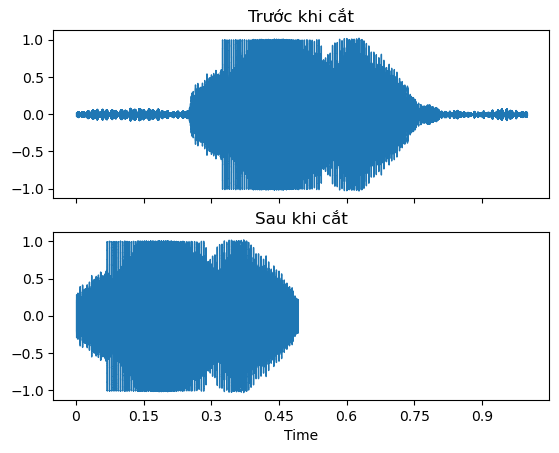

In [260]:

x = trim_silence(y)

fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Trước khi cắt')
ax[0].label_outer()
librosa.display.waveshow(x, sr=sr, ax=ax[1])
ax[1].set(title='Sau khi cắt')
ax[1].label_outer()